In [6]:
from pomegranate.distributions import Categorical
from pomegranate.distributions import ConditionalCategorical
from pomegranate.bayesian_network import *
import torch

OSError: [WinError 127] The specified procedure could not be found. Error loading "c:\Users\Koi\anaconda3\envs\SE411_2024\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

## Task 1: Diseases


In [3]:
d1 = Categorical([[0.99, 0.01]])
# 0 = diseased
# 1 = not diseased

d2 = ConditionalCategorical([[[0.95, 0.05], [0.03, 0.97]]])
# 0 = test+
# 1 = test-


model = BayesianNetwork()
model.add_distributions([d1, d2])
model.add_edge(d1, d2)

In [6]:
model.distributions[0].probs, model.distributions[1].probs[0]

(Parameter containing:
 tensor([[0.9900, 0.0100]]),
 Parameter containing:
 tensor([[0.9500, 0.0500],
         [0.0300, 0.9700]]))

In [7]:
X = torch.tensor([[0,-1]])
predict = model.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))
print("Diseased and")
print(f"Test+ = {predict[1][0][0]}")
print(f"Test- = {predict[1][0][1]}")

Diseased and
Test+ = 0.949999988079071
Test- = 0.05000000074505806


c:\Users\Koi\anaconda3\envs\SE411_3rd_310\lib\site-packages\torch\masked\maskedtensor\core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


In [8]:
X = torch.tensor([[1,-1]])
predict = model.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))
print("Diseased and")
print(f"Test+ = {predict[1][0][0]}")
print(f"Test- = {predict[1][0][1]}")

Diseased and
Test+ = 0.029999999329447746
Test- = 0.9700000286102295


# Task 2: Raining and Wet


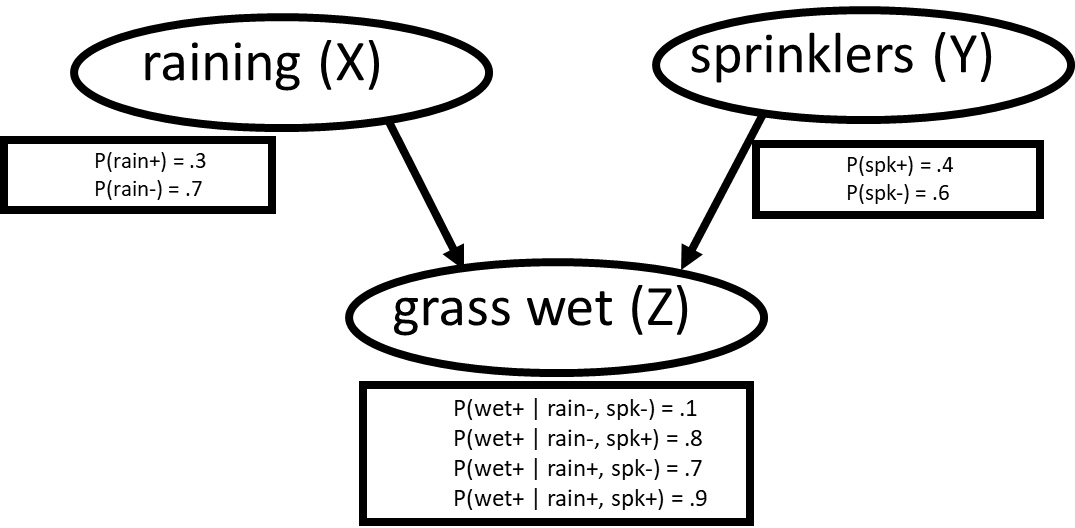

In [6]:
p1 = Categorical([[0.3, 0.7]]) #2d array
# 0 = raining
# 1 = not raining

p2 = Categorical([[0.4, 0.6]]) #2d array
# 0 = sprinklers
# 1 = no sprinklers

p3 = ConditionalCategorical([[[[0.9, 0.1], [0.7, 0.3]], 
                              [[0.8, 0.2], [0.1, 0.9]]]]) #3d array
# 0 = wet
# 1 = not wet
# indices
# 0,0 = raining & sprinklers
# ...

model2 = BayesianNetwork()
model2.add_distributions([p1, p2, p3])
model2.add_edges([(p1, p3), (p2, p3)])

In [11]:
model2.distributions[0].probs, model2.distributions[1].probs, *model2.distributions[2].probs

# model2.distributions[0].probs - p1 raining
# model2.distributions[1].probs - p2 sprinklers
# *model2.distributions[2].probs or model2.distributions[2].probs[0] - p3 wet 



(Parameter containing:
 tensor([[0.3000, 0.7000]]),
 Parameter containing:
 tensor([[0.4000, 0.6000]]),
 Parameter containing:
 tensor([[[0.9000, 0.1000],
          [0.7000, 0.3000]],
 
         [[0.8000, 0.2000],
          [0.1000, 0.9000]]]))

In [16]:
# torch.tensor([[-1, -1, 0]]) --> [unknown(raining), unknown(sprinkler), Wet]

X = torch.tensor([[-1, -1, 0]])
predict = model2.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))

print(predict)

print("Wet and")
print(f"Rain = {predict[0][0][0]}")
print(f"No Rain = {predict[0][0][1]}")

print("Wet and")
print(f"Sprinklers = {predict[1][0][0]}")
print(f"No Sprinklers = {predict[1][0][1]}")



[tensor([[0.4680, 0.5320]]), tensor([[0.6640, 0.3360]]), tensor([[1., 0.]])]
Wet and
Rain = 0.46799999475479126
No Rain = 0.5320000052452087
Wet and
Sprinklers = 0.6639999747276306
No Sprinklers = 0.335999995470047


In [8]:
# torch.tensor([[1, -1, 0]]) --> [Not raining, unknown, Wet]

X = torch.tensor([[1, -1, 0]])
predict = model2.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))

print(predict)

print("Wet, Not raining and")
print(f"Sprinklers = {predict[1][0][0]}")
print(f"No Sprinklers = {predict[1][0][1]}")

[tensor([[0., 1.]]), tensor([[0.8421, 0.1579]]), tensor([[1., 0.]])]
Wet, Not raining and
Sprinklers = 0.8421052694320679
No Sprinklers = 0.15789474546909332


# Task 3: What the dog doin?

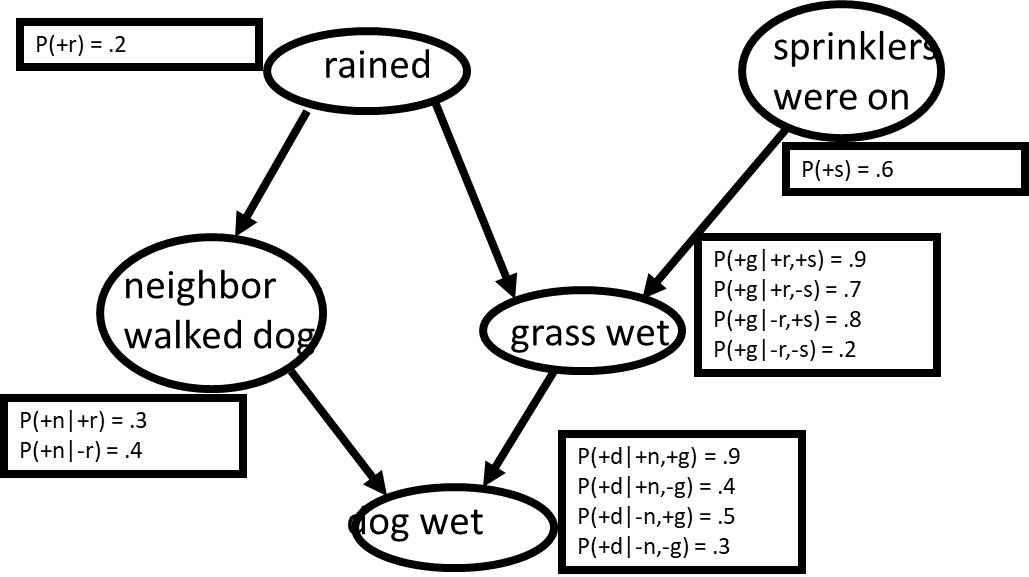

In [18]:
x1 = Categorical([[0.2, 0.8]])  
# [0] +r
# [1] -r

x2 = Categorical([[0.6, 0.4]])  
# [0] +s
# [1] -s

x3 = ConditionalCategorical([[[0.3, 0.7], [0.4, 0.6]]])
# P(x3|x1) 
# [0] +r -> +n -n
# [1] -r -> +n -n


x4 = ConditionalCategorical([[[[0.9, 0.1], [0.7, 0.3]], [[0.8, 0.2], [0.2, 0.8]]]])
# P(x4|x1,x2)
# +r & +s -s -> +g -g, -r & +s -s -> +g -g

x5 = ConditionalCategorical([[[[0.9, 0.1], [0.4, 0.6]], [[0.5, 0.5], [0.3, 0.7]]]])
# P(x5|x3,x4)
# +n & +g -g -> +dw -dw, -n & +g -g -> +dw -dw

model3 = BayesianNetwork()
model3.add_distributions([x1, x2, x3, x4, x5])
model3.add_edges([(x1, x3), (x1, x4), (x2, x4), (x3, x5), (x4, x5)])

In [19]:
# torch.tensor([[0, -1, -1, -1, -1]]) --> [rain, unknown(sprinkler), unknown(neighbor) ,unknown(grasswet) ,unknown(dogwet)]

X = torch.tensor([[0, -1, -1, -1, -1]])
predict = model3.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))

print(predict)

print("Prob. dog is wet when it rains")
print(predict[4][0][0])

[tensor([[1., 0.]]), tensor([[0.6000, 0.4000]]), tensor([[0.3000, 0.7000]]), tensor([[0.8200, 0.1800]]), tensor([[0.5678, 0.4322]])]
Prob. dog is wet when it rains
tensor(0.5678)


c:\Users\Koi\anaconda3\envs\SE411_3_11\Lib\site-packages\torch\masked\maskedtensor\core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


In [23]:
# torch.tensor([[-1, 0, 0, -1, -1]]) --> [unknown(rain), sprinkler, neighbor ,unknown(grasswet) ,unknown(dogwet)]
X = torch.tensor([[-1, 0, 0, -1, -1]])

predict = model3.predict_proba(torch.masked.MaskedTensor(X, mask=(X != -1)))

print(predict)

print("Prob. dog is wet when neighbor walks the dog and sprinklers are on")
print(predict[4][0][0])

[tensor([[0.1579, 0.8421]]), tensor([[1., 0.]]), tensor([[1., 0.]]), tensor([[0.8158, 0.1842]]), tensor([[0.8079, 0.1921]])]
Prob. dog is wet when neighbor walks the dog and sprinklers are on
tensor(0.8079)
